<a href="https://colab.research.google.com/github/sampritich/samplerepo/blob/master/827_m1_demo2_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics
# Module 1 - Statistical Foundations
## Demo 2 - Measures of Center

### Use-Case: Predict Future Sales

### Load Data

In [0]:
import pandas as pd

In [1]:
!wget https://www.dropbox.com/s/m49xi2l7zm2ppqk/InputDataFiles.zip

--2019-12-21 09:29:25--  https://www.dropbox.com/s/m49xi2l7zm2ppqk/InputDataFiles.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/m49xi2l7zm2ppqk/InputDataFiles.zip [following]
--2019-12-21 09:29:25--  https://www.dropbox.com/s/raw/m49xi2l7zm2ppqk/InputDataFiles.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc494f98b64bde1f9a9d9641103d.dl.dropboxusercontent.com/cd/0/inline/Auojpdj1ckTbQsNFAoa-X7xtaAhZPae-D-o9oANaKWOGU8Le62fzQYWKTWv_3JdMM2Azs0JfOvApI8LOCJnSfAJYXd9YwbOwk6xJN_t-hUVnDV8rFgkF6cz4mIhlf1vfRnY/file# [following]
--2019-12-21 09:29:25--  https://uc494f98b64bde1f9a9d9641103d.dl.dropboxusercontent.com/cd/0/inline/Auojpdj1ckTbQsNFAoa-X7xtaAhZPae-D-o9oANaKWOGU8Le62fzQYWKTWv_3JdMM2Azs0JfOvApI8LOCJnSfAJYXd9Yw

In [2]:
!unzip InputDataFiles.zip


Archive:  InputDataFiles.zip
   creating: InputDataFiles/
  inflating: InputDataFiles/items.csv  
  inflating: InputDataFiles/item_categories.csv  
  inflating: InputDataFiles/sales_train.csv  
  inflating: InputDataFiles/shops.csv  
  inflating: InputDataFiles/Supermarket.csv  


In [8]:
train = pd.read_csv("/content/InputDataFiles/sales_train.csv")
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1


### Calculating Measures of Central Tendency

### Mean: Represents average values

In [9]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,1.043246e+06,1.043246e+06,1.043246e+06,1.043246e+06,1.043246e+06
mean,4.472810e+00,3.245368e+01,1.024260e+04,6.823654e+02,1.220174e+00
std,2.967065e+00,1.625856e+01,6.305360e+03,1.124829e+03,1.600203e+00
min,0.000000e+00,0.000000e+00,1.200000e+01,-1.000000e+00,-6.000000e+00
25%,2.000000e+00,2.200000e+01,4.548000e+03,1.990000e+02,1.000000e+00
50%,4.000000e+00,3.000000e+01,9.691000e+03,3.990000e+02,1.000000e+00
75%,7.000000e+00,4.700000e+01,1.561875e+04,6.993000e+02,1.000000e+00
max,1.000000e+01,5.900000e+01,2.216800e+04,5.920000e+04,2.880000e+02


### Median: Middle value of dataset

In [10]:
train.median()


date_block_num       4.0
shop_id             30.0
item_id           9691.0
item_price         399.0
item_cnt_day         1.0
dtype: float64

In [29]:
train.shape


(1043246, 6)

In [65]:
#train.iloc[0]## first row of data frame
#train.iloc[169:171,0:3]#First column
train.mode()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,23.02.2013,2,31,20949,299.0,1


In [0]:
'''data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)
# Columns:
data.iloc[:,0] # first column of data frame (first_name)
data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)'''



### Outliers

#### Using Z-Score

In [0]:
from scipy import stats
import numpy as np

In [16]:
# Using Z-score function defined in scipy library to detect the outliers
z = np.abs(stats.zscore(train[['item_price','item_cnt_day']]))
print(z)

[[0.28149591 0.13759157]
 [0.19259347 0.13759157]
 [0.19259347 1.38743362]
 ...
 [0.42972364 0.13759157]
 [0.51862608 0.13759157]
 [0.42972364 0.13759157]]


In [47]:
# Define a threshold to identify an outlier
threshold = 5
print(np.where(z > threshold))

(array([    117,     169,     457, ..., 1042982, 1043154, 1043198]), array([1, 1, 0, ..., 0, 1, 1]))


In [48]:
# The first array contains the list of row numbers and second array respective column numbers, 
# which mean z[352][1] have a Z-score higher than 5.
print(z[117][1])

7.36146071862519


In [50]:
# Printing the sample values for the same
train.iloc[169:171]
z[169][1]

7.36146071862519

#### Using IQR

In [0]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    print(iqr)
    fence_low  = q1-1.5*iqr
    print(fence_low)
    fence_high = q3+1.5*iqr
    print(fence_high)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print(df_out)
    return df_out

In [57]:
remove_outlier(train,"item_price").head()

500.29999999999995
-551.4499999999999
1449.75
               date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0        02.01.2013               0       59    22154       999.0             1
1        03.01.2013               0       25     2552       899.0             1
2        05.01.2013               0       25     2552       899.0            -1
4        15.01.2013               0       25     2555      1099.0             1
5        12.01.2013               0       25     3253       899.0             1
...             ...             ...      ...      ...         ...           ...
1043241  07.11.2013              10       37    18474       199.0             1
1043242  18.11.2013              10       37    18474       199.0             1
1043243  24.11.2013              10       37    18484       199.0             1
1043244  11.11.2013              10       37    19751        99.0             1
1043245  26.11.2013              10       37    18498       199.0         

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1
1,03.01.2013,0,25,2552,899.0,1
2,05.01.2013,0,25,2552,899.0,-1
4,15.01.2013,0,25,2555,1099.0,1
5,12.01.2013,0,25,3253,899.0,1


#### Using box plots

In [0]:
%matplotlib inline
import seaborn as sns

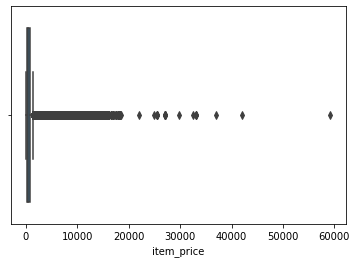

In [59]:
sns.boxplot(x=train['item_price'])

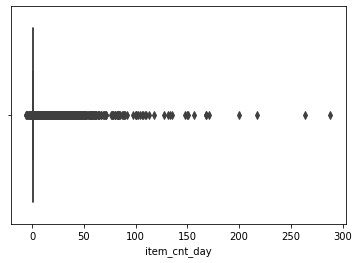

In [60]:
sns.boxplot(x=train['item_cnt_day'])

#### Using scatter plots

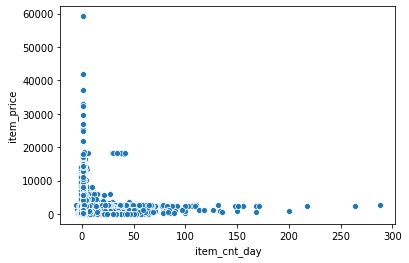

In [61]:
sns.scatterplot(x="item_cnt_day", y="item_price", data=train)

### Mode

In [62]:
train.mode()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,23.02.2013,2,31,20949,299.0,1
